In [1]:
import pandas as pd  


import os
for dirname, list,filenames in os.walk("D:\data_analyst\portfolio"):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import sqlite3
import matplotlib.pyplot as plt
import pandas as pd

D:\data_analyst\portfolio\certi _ project.txt
D:\data_analyst\portfolio\imdb\imdb_movies_analysis.ipynb
D:\data_analyst\portfolio\imdb\imdb_top_1000.csv


Connection

In [2]:
csv = "D:\data_analyst\portfolio\imdb\imdb_top_1000.csv"
connection = sqlite3.connect("movies.db")
minion = connection.cursor()

In [3]:
SQL_command = """
    drop table movies_data2
        """
minion.execute(SQL_command)

OperationalError: no such table: movies_data2

Ingesting Data

In [4]:
SQL_command = """
     create TABLE
        movies_data1
        (
            title TEXT NOT NULL,
            release_year text,
            certificate TEXT,
            genre TEXT,
            runtime INTEGER,
            imdb_rating REAL NOT NULL,
            director TEXT,
            num_votes INTEGER,
            gross REAL
        );
        """
minion.execute(SQL_command)


In [5]:
SQL_command = """
    INSERT INTO
        movies_data1
    VALUES
        (?, ?, ?, ?, ?, ?, ?, ?, ?);
"""

# Iterate the csv by chunks of 100.
chunksize = 100
for chunk in pd.read_csv(csv, chunksize=chunksize):
    records = []
    for index, row in chunk.iterrows():
        record = (
            row['Series_Title'],
            row['Released_Year'],
            row['Certificate'],
            row['Genre'],
            int(row['Runtime'].split()[0]),
            row['IMDB_Rating'],
            row['Director'],
            row['No_of_Votes'],
            row['Gross']
        )
        records.append(record)
    minion.executemany(SQL_command, records)
    connection.commit()

In [6]:
SQL_command = """
    SELECT count(*) 
    FROM
        movies_data1
"""
minion.execute(SQL_command)
print(minion.fetchone())

(1000,)


In [27]:
top10 = pd.read_sql("Select * from movies_data1 limit 10",connection)
top10

,title,release_year,certificate,genre,runtime,imdb_rating,director,num_votes,gross
0,The Shawshank Redemption,1994,A,Drama,142,9.3,Frank Darabont,2343110,"28,341,469"
1,The Godfather,1972,A,"Crime, Drama",175,9.2,Francis Ford Coppola,1620367,"134,966,411"
2,The Dark Knight,2008,UA,"Action, Crime, Drama",152,9.0,Christopher Nolan,2303232,"534,858,444"
3,The Godfather: Part II,1974,A,"Crime, Drama",202,9.0,Francis Ford Coppola,1129952,"57,300,000"
4,12 Angry Men,1957,U,"Crime, Drama",96,9.0,Sidney Lumet,689845,"4,360,000"
5,The Lord of the Rings: The Return of the King,2003,U,"Action, Adventure, Drama",201,8.9,Peter Jackson,1642758,"377,845,905"
6,Pulp Fiction,1994,A,"Crime, Drama",154,8.9,Quentin Tarantino,1826188,"107,928,762"
7,Schindler's List,1993,A,"Biography, Drama, History",195,8.9,Steven Spielberg,1213505,"96,898,818"
8,Inception,2010,UA,"Action, Adventure, Sci-Fi",148,8.8,Christopher Nolan,2067042,"292,576,195"
9,Fight Club,1999,A,Drama,139,8.8,David Fincher,1854740,"37,030,102"




DESCRIPTIVE QUESTIONS

1.movies

    #. Which movie got the highest votes?
    #. What was the highest rated film for each of the certifications
    #. which movie have the longest runtime between 1950 and 2021?
    #. What are the least grossing movie in the top 1000
    #. How many movies are in the top 1000 that are less than 2 hours?


2.director

    #. Which director has the highest average IMDb rating?
    #. which director has the most number of movies in this list?

3.year

    #Which year had the most number of movies in this list?


STATISTICAL QUESTIONS

    1. does runtime have a correlation with being the rating?
    2. Are there statistically significant differences in IMDb ratings between different genres
    3. are there statistically significant differences in gross between IMDB ratings

............................................................................................................................................................

MOVIES

In [7]:
#Which movie got the highest votes?

highest_vote = pd.read_sql("Select title, num_votes, imdb_rating, runtime from movies_data1 order by num_votes desc limit 2 ",connection)
highest_vote


,title,num_votes,imdb_rating,runtime
0,The Shawshank Redemption,2343110,9.3,142
1,The Dark Knight,2303232,9.0,152


In [8]:
#What was the highest rated film for each of the certifications
SQL_command = """
    SELECT
        title,
        MAX(imdb_rating),
        certificate
    FROM
        movies_data1
    WHERE
        certificate != 'Unknown' and (certificate == 'A' or certificate == 'U' or certificate == 'G')
    GROUP BY
        certificate;
"""
minion.execute(SQL_command)

data = minion.fetchone()
while data:
    print(f"The highest rated production for {data[2]} was '{data[0]}' with an imdb rating of {data[1]}.")
    data = minion.fetchone()



The highest rated production for A was 'The Shawshank Redemption' with an imdb rating of 9.3.
The highest rated production for G was 'Modern Times' with an imdb rating of 8.5.
The highest rated production for U was '12 Angry Men' with an imdb rating of 9.0.


In [9]:
#which movie have the longest runtime between 1950 and 2021?
SQL_command = """
    SELECT
        title,
        MAX(runtime)
    FROM
        movies_data1
    WHERE
        CAST(release_year AS INTEGER) >= 1950 AND
        CAST(release_year AS INTEGER) <= 2021
    limit 10;
"""
minion.execute(SQL_command)

data = minion.fetchone()
print(f"The longest runtime between 1950 and 2021 was {data[1]} minutes for {data[0]}. \nTop 10: ")
limit_10 = pd.read_sql("""
    SELECT
        title,
        runtime
    FROM
        movies_data1
    WHERE
        CAST(release_year AS INTEGER) >= 1950 AND
        CAST(release_year AS INTEGER) <= 2021
    order by runtime desc
    limit 10;
""",connection)
limit_10

The longest runtime between 1950 and 2021 was 321 minutes for Gangs of Wasseypur. 
Top 10: 


,title,runtime
0,Gangs of Wasseypur,321
1,Hamlet,242
2,Once Upon a Time in America,229
3,Lawrence of Arabia,228
4,Lagaan: Once Upon a Time in India,224
5,The Ten Commandments,220
6,Ben-Hur,212
7,"Swades: We, the People",210
8,The Irishman,209
9,Shichinin no samurai,207


In [10]:
#What are the least grossing movie in the top 1000

SQL_command = """
    SELECT
        title,
        min(gross)
    FROM
        movies_data1
"""
minion.execute(SQL_command)

data = minion.fetchone()
print(f"The least grossing movie is '{data[0]}', which has only made {data[1]} $ ")

The least grossing movie is 'Cowboy Bebop: Tengoku no tobira', which has only made 1,000,045 $ 


In [11]:
#How many movies are in the top 1000 that are less than 2 hours?
rt_2 = pd.read_sql("""
                select count(*) 
                from movies_data1
                where runtime < 120""",connection)
rt_2

,count(*)
0,506


Director

In [12]:
#. Which director has the highest average IMDb rating?
director_top = pd.read_sql("""
                select director, avg(imdb_rating)
                from movies_data1
                group by director
                order by avg(imdb_rating) desc
                limit 13;
                """,connection)
director_top

,director,avg(imdb_rating)
0,Frank Darabont,8.9500
1,Lana Wachowski,8.7000
2,Irvin Kershner,8.7000
3,Thomas Kail,8.6000
4,Sudha Kongara,8.6000
5,Roberto Benigni,8.6000
6,Masaki Kobayashi,8.6000
7,George Lucas,8.6000
8,Fernando Meirelles,8.6000
9,Roger Allers,8.5000


In [68]:
#. which director has the most number of movies in this list?
SQL_command = """ select director, count(*) as number_of_movies
                 from movies_data1
                 group by director   
                 order by number_of_movies desc
                 limit 1;"""
minion.execute(SQL_command)
data = minion.fetchone()
print(f"The director has the most number of movies in the list is '{data[0]}' with {data[1]}. \nTop 13: ")

director_nums = pd.read_sql("""
                select director, count(*) as number_of_movies
                from movies_data1
                group by director
                order by number_of_movies desc
                limit 13;
                """,connection)
director_nums





The director has the most number of movies in the list is 'Alfred Hitchcock' with 14. 
Top 13: 


,director,number_of_movies
0,Alfred Hitchcock,14
1,Steven Spielberg,13
2,Hayao Miyazaki,11
3,Martin Scorsese,10
4,Akira Kurosawa,10
5,Woody Allen,9
6,Stanley Kubrick,9
7,Billy Wilder,9
8,Quentin Tarantino,8
9,David Fincher,8


YEAR

In [13]:
#Which year had the most number of movies in this list?

SQL_command = """ select release_year, count(*) as number_of_movies
                 from movies_data1
                 group by release_year   
                 order by number_of_movies desc
                 limit 1;"""
minion.execute(SQL_command)
data = minion.fetchone()
print(f"The year has the most number of movies in the list is '{data[0]}' with {data[1]}. ")

The year has the most number of movies in the list is '2014' with 32. 


#Statistic

In [14]:
# 1. Does runtime have a correlation with being the rating?
mdata = pd.read_csv(csv)

mdata.Runtime = mdata["Runtime"].str.replace("min", "")
mdata.Runtime= mdata["Runtime"].astype(int)
mdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   int32  
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int32(1), int64(1), object(12)
memory usage: 121.2+ KB


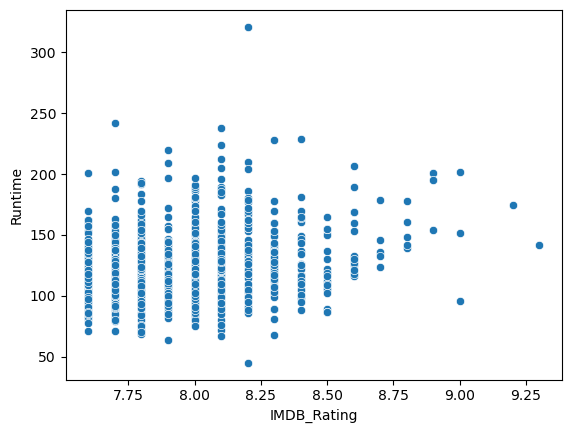

In [15]:
import seaborn as sns

sns.scatterplot( y = "Runtime",x = "IMDB_Rating", data = mdata )
plt.show()

In [16]:
#2. Are there statistically significant differences in IMDb ratings between different genres

data_1 = pd.read_sql("""
                    select imdb_rating, avg(gross) as avg_gross
                    from movies_data1
                    group by imdb_rating
                    order by imdb_rating desc;
                    
                    """,connection)
data_1

,imdb_rating,avg_gross
0,9.3,28.000000
1,9.2,134.000000
2,9.0,198.333333
3,8.9,193.333333
4,8.8,196.000000
5,8.7,192.200000
6,8.6,135.272727
7,8.5,98.947368
8,8.4,184.120000
9,8.3,99.307692


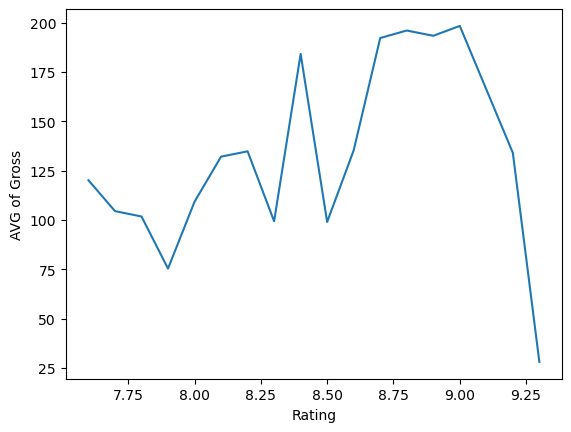

In [17]:

import seaborn as sns

sns.lineplot( y = "avg_gross",x = "imdb_rating", data = data_1 )
plt.xlabel("Rating")
plt.ylabel("AVG of Gross")
plt.show()